In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')

plt.rcParams['figure.figsize'] = (6, 4)

In [2]:
data= pd.read_csv('C:\\Users\\91829\\Downloads\\911.csv')
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652692 entries, 0 to 652691
Data columns (total 9 columns):
lat          652692 non-null float64
lng          652692 non-null float64
desc         652692 non-null object
zip          573727 non-null float64
title        652692 non-null object
timeStamp    652692 non-null object
twp          652409 non-null object
addr         652692 non-null object
e            652692 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 44.8+ MB


Basic Analysis

Let’s check out the top 5 zipcodes for calls.

In [5]:
data['zip'].value_counts().head()

19401.0    44785
19464.0    43155
19403.0    34299
19446.0    31715
19406.0    22071
Name: zip, dtype: int64

The top townships for the calls were as follows:

In [7]:
data['twp'].value_counts().head()

LOWER MERION    54686
ABINGTON        39302
NORRISTOWN      36931
UPPER MERION    35412
CHELTENHAM      30044
Name: twp, dtype: int64

For 650k + entries, how many unique call titles did we have?

In [8]:
data['title'].nunique()

148

# Data Wrangling for Feature Creation

In [10]:
data['reason'] = data['title'].apply(lambda x: x.split(':')[0])
data.tail()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
652687,40.116526,-75.340552,DEKALB ST & E MARSHALL ST; NORRISTOWN; Statio...,19401.0,EMS: SEIZURES,2020-06-29 11:20:11,NORRISTOWN,DEKALB ST & E MARSHALL ST,1,EMS
652688,40.081618,-75.405643,BRYCE LN & E SWEDESFORD RD; UPPER MERION; Sta...,19406.0,EMS: POISONING,2020-06-29 11:16:38,UPPER MERION,BRYCE LN & E SWEDESFORD RD,1,EMS
652689,40.172526,-75.284653,DEKALB PIKE & BLUE BELL SPRINGS DR; WHITPAIN; ...,19422.0,Traffic: VEHICLE ACCIDENT -,2020-06-29 11:17:27,WHITPAIN,DEKALB PIKE & BLUE BELL SPRINGS DR,1,Traffic
652690,40.376450,-75.481847,5TH ST & BITTING ALY; RED HILL; Station 369; ...,18076.0,EMS: BACK PAINS/INJURY,2020-06-29 11:23:32,RED HILL,5TH ST & BITTING ALY,1,EMS
652691,40.176853,-75.080834,COUNTY LINE RD & CENTENNIAL RD; UPPER MORELAN...,19040.0,EMS: FALL VICTIM,2020-06-29 11:27:40,UPPER MORELAND,COUNTY LINE RD & CENTENNIAL RD,1,EMS


Now, let’s find out the most common reason for 911 calls, according to our dataset.

In [11]:
data['reason'].value_counts().head()

EMS        326850
Traffic    227045
Fire        98797
Name: reason, dtype: int64

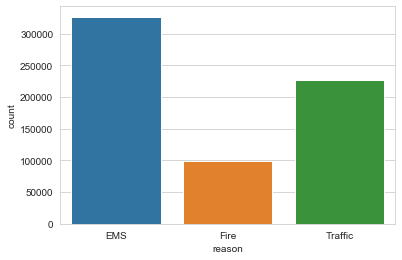

In [12]:
sns.countplot(data['reason'])

In [17]:
type(data['timeStamp'][0])

str

As the timestamps are still string types, it’ll make our life easier if we convert it to a python DateTime object, so we can extract the year, month, and day information more intuitively.

In [18]:
data['timeStamp'] = pd.to_datetime(data['timeStamp'])

For a single DateTime object, we can extract information as follows.

In [20]:
time = data['timeStamp'].iloc[0]

print('Hour:',time.hour)
print('Month:',time.month)
print('Day of Week:',time.dayofweek)

Hour: 17
Month: 12
Day of Week: 3


Now let’s create new features for the above pieces of information.

In [27]:
data['Hour'] = data['timeStamp'].apply(lambda x: x.hour)
data['Month'] = data['timeStamp'].apply(lambda x: x.month)
data['Day of Week'] = data['timeStamp'].apply(lambda x: x.dayofweek)

data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,3


In [28]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
data['Day of Week'] = data['Day of Week'].map(dmap)

data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu


Let’s combine the newly created features, to check out the most common call reasons based on the day of the week.

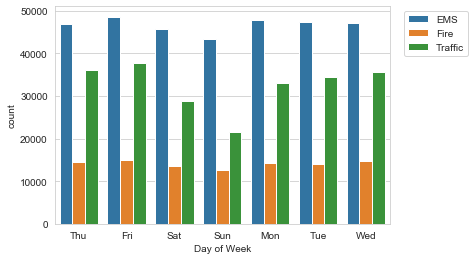

In [29]:
sns.countplot(data['Day of Week'],hue=data['reason'])

plt.legend(bbox_to_anchor=(1.25,1))

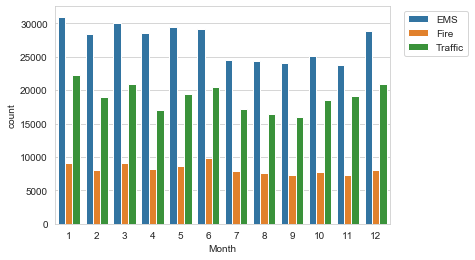

In [30]:
sns.countplot(data['Month'],hue=data['reason'])

plt.legend(bbox_to_anchor=(1.25,1))

In [32]:
byMonth = data.groupby(by='Month').count()

Text(0, 0.5, 'Number of Calls')

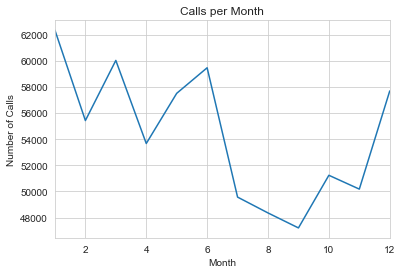

In [33]:
byMonth['e'].plot.line(y='e')
plt.title('Calls per Month')
plt.ylabel('Number of Calls')

Text(-6.949999999999996, 0.5, 'Number of Calls')

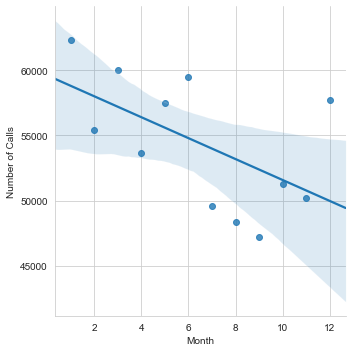

In [34]:
byMonth.reset_index(inplace=True)

sns.lmplot(x='Month',y='e',data=byMonth)
plt.ylabel('Number of Calls')

So, it does seem that there are more emergency calls during the holiday seasons.

In [35]:
data['Date']=data['timeStamp'].apply(lambda x: x.date())
data.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10


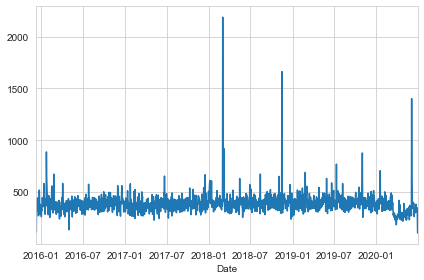

In [36]:
data.groupby(by='Date').count()['e'].plot.line(y='e')
plt.legend().remove()
plt.tight_layout()

Let’s create a heatmap for the counts of calls on each hour, during a given day of the week.

In [49]:
day_hour = data.pivot_table(values='lat',index='Day of Week',columns='Hour',aggfunc='count')

day_hour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,1949,1615,1429,1281,1309,1609,2634,4098,4971,5214,...,6259,6931,6978,7000,5576,4979,4310,3845,3364,2805
Mon,1865,1539,1342,1256,1319,1815,2646,4384,5450,5651,...,5558,6104,6242,6302,5331,4403,3703,3173,2617,2035
Sat,2401,2021,1860,1562,1427,1548,1859,2450,3409,4267,...,5350,5100,5130,5127,4896,4675,4073,3830,3164,2919
Sun,2389,2102,1913,1583,1445,1466,1704,2371,2963,3661,...,4668,4379,4501,4428,4310,4068,3679,3099,2575,2291
Thu,1713,1391,1404,1215,1269,1746,2783,4394,5245,5334,...,5975,6381,6289,6842,5423,4623,3981,3437,2804,2330
Tue,1682,1423,1295,1187,1220,1714,2745,4358,5536,5467,...,5818,6144,6385,6790,5528,4521,3773,3334,2641,2090
Wed,1637,1444,1240,1240,1101,1570,2619,4592,5396,5352,...,5961,6430,6670,6962,5595,4615,4054,3491,2778,2168


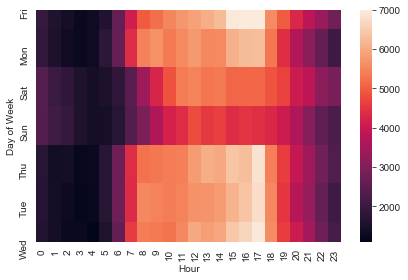

In [50]:
sns.heatmap(day_hour)

plt.tight_layout()

We see that most calls take place around the end of office hours on weekdays. We can create a clustermap to pair up similar Hours and Days.

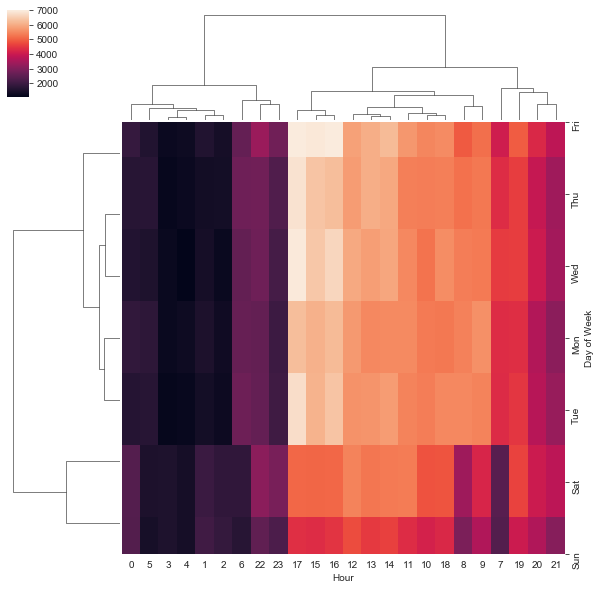

In [51]:
sns.clustermap(day_hour)